# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


# Data Analysis

In [3]:
df.shape

(47692, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [5]:
df.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,Having a high level of toxicity in your commun...,religion
freq,2,7998


In [6]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [7]:
df['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

# Removing Duplicate data

In [8]:
df.loc[df.duplicated()]

,tweet_text,cyberbullying_type
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
3833,But you all respect him....Pete hasn't read tw...,not_cyberbullying
3939,This is the opportunity to prove ourselves lik...,not_cyberbullying
5684,Strategicscoring should be classed as cheating...,not_cyberbullying
6975,"If we're at the bottom of the leaderboard, we'...",not_cyberbullying
7227,It wouldn't be fair. Kat knows NOTHING of fair...,not_cyberbullying
7278,@TVWEEKmag: There is only 1 way to stay in the...,not_cyberbullying
7822,@Ima_TV_Junkie: What the hell were Annie and L...,not_cyberbullying
9672,@victorymonk: #sorryitsaboy joke means more bo...,gender
9835,@thisonesakillaa: In my opinion? All jokes are...,gender


In [9]:
data = df.drop_duplicates()

In [10]:
data.shape

(47656, 2)

# Data Cleaning

In [11]:
from nltk.corpus import stopwords
import re
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS

In [12]:
def case_convert():
    data.tweet_text = [i.lower() for i in data.tweet_text.values]
def remove_specials():
    data.tweet_text = [re.sub(r"[^a-zA-Z]"," ", text) for text in data.tweet_text.values]
def remove_shorthands():
    short_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(short_dict.keys()):
                string = string + " " + short_dict[word]
            else:
                string = string +  " " + word
        texts.append(string.strip())
    data.tweet_text=texts
def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for text in data.tweet_text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.tweet_text=texts
def remove_links():
    texts = []
    for text in data.tweet_text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.tweet_text = texts
def remove_accents():
    data.tweet_text = [unidecode.unidecode(text) for text in data.tweet_text.values]
def normalize_spaces():
    data.tweet_text = [re.sub(r"\s+"," ",text) for text in data.tweet_text.values]
            

In [13]:
case_convert()
remove_specials()
remove_shorthands()
remove_stopwords()
remove_links()
remove_stopwords()
normalize_spaces()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
data

,tweet_text,cyberbullying_type
0,words katandandre food crapilicious mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,xochitlsuckkks classy whore red velvet cupcakes,not_cyberbullying
3,jason gio meh p thanks heads concerned another...,not_cyberbullying
4,rudhoeenglish isis account pretending kurdish ...,not_cyberbullying
...,...,...
47687,black ppl expected anything depended anything ...,ethnicity
47688,turner withhold disappointment turner called c...,ethnicity
47689,swear god dumb nigger bitch got bleach hair re...,ethnicity
47690,yea fuck rt therealexel youre nigger fucking u...,ethnicity


In [15]:
encoder = LabelEncoder()
data.cyberbullying_type = encoder.fit_transform(data.cyberbullying_type)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
encoder.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [17]:
lenc = LabelEncoder()
data.cyberbullying_type = lenc.fit_transform(data.cyberbullying_type)

In [18]:
lenc.classes_

array([0, 1, 2, 3, 4, 5])

In [19]:
classes = ['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion']

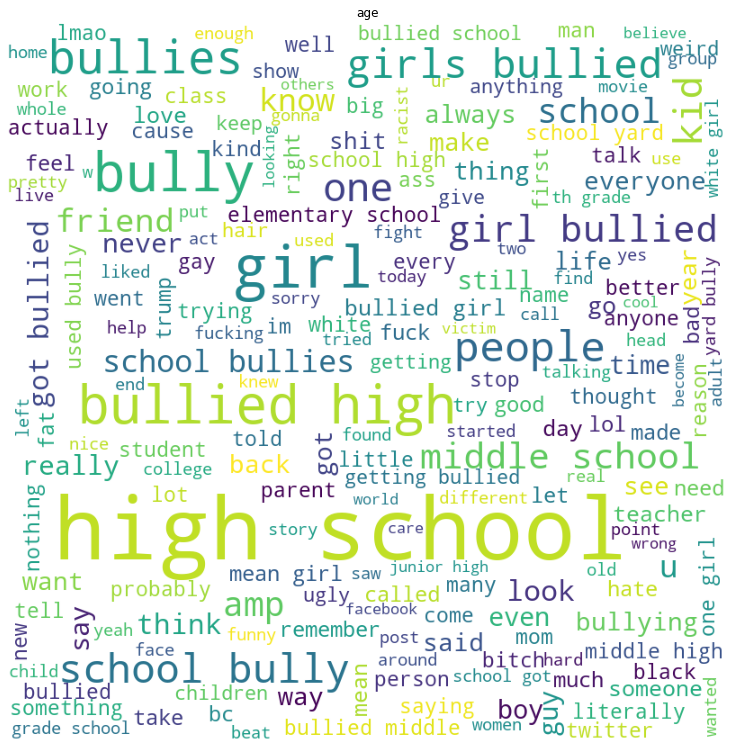

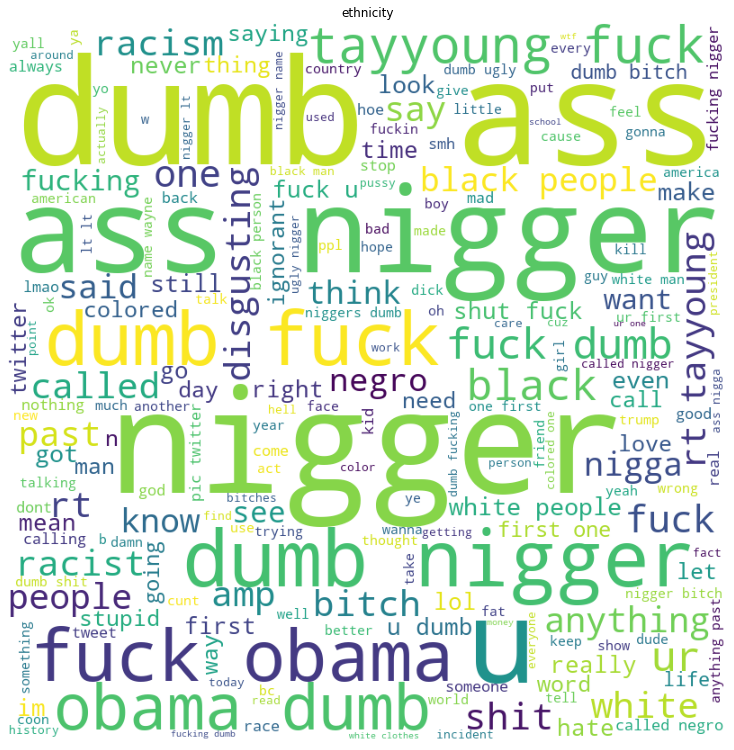

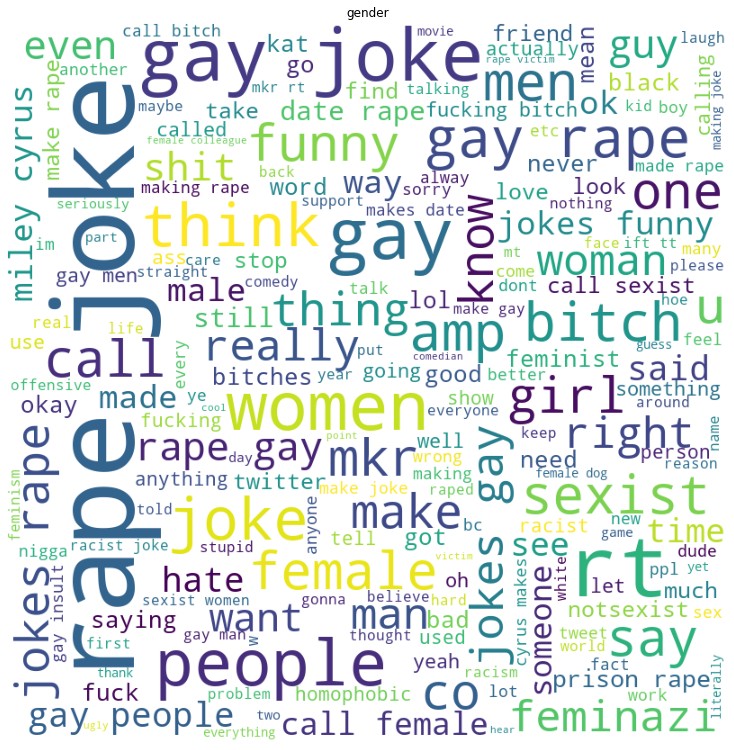

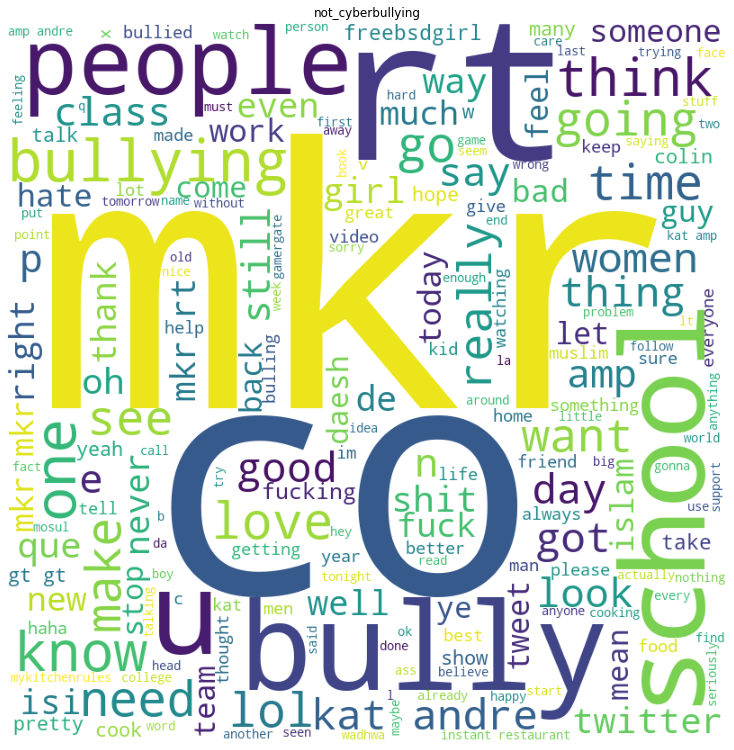

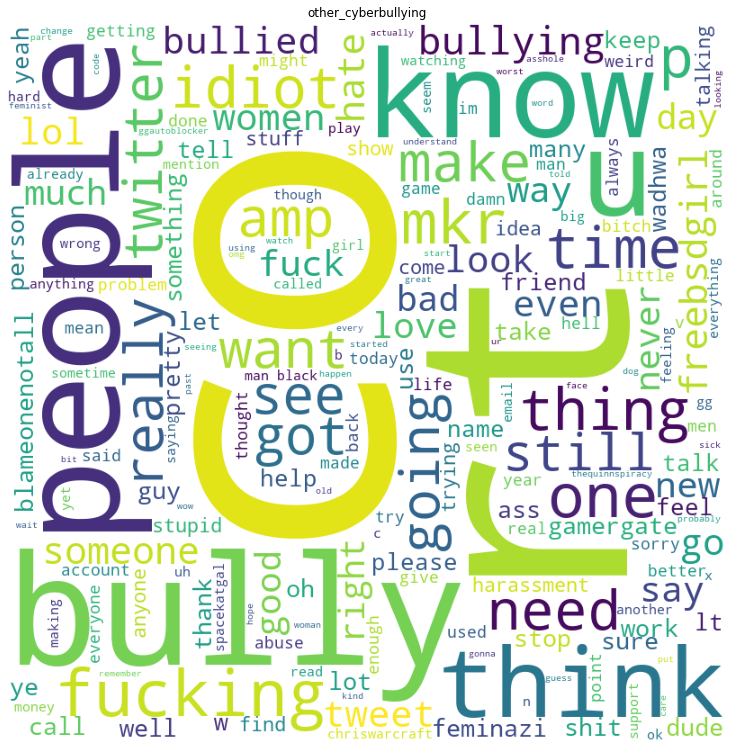

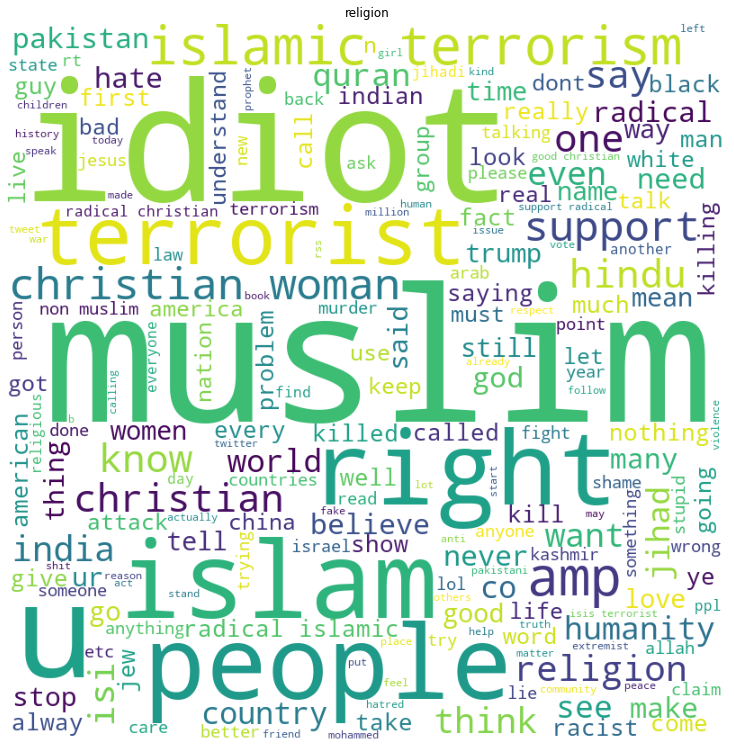

In [20]:
for c in range(len(lenc.classes_)):
    string = ""
    for i in data[data.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (10, 20), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(classes[c])
    plt.show()
    del string


In [21]:
vec = TfidfVectorizer(max_features=3000)

In [22]:
X = vec.fit_transform(data.tweet_text.values).toarray()

In [23]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
y =  data.cyberbullying_type.values.reshape(-1,1)

In [25]:
y

array([[3],
       [3],
       [3],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(47656, 3000) (38124, 3000) (9532, 3000)


In [29]:
y_train.shape

(38124, 1)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score


# classification using random forest classifier

In [32]:
rf = RandomForestClassifier(n_estimators=10,random_state=42)
rf.fit(X_train, y_train)

<ipython-input-32-8308c6d1e8df>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=42)

In [33]:
y_pred = rf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report


In [37]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1570,    1,    4,   12,   14,    1],
       [   1, 1616,    3,    4,   11,    1],
       [   3,    2, 1263,  122,  120,    4],
       [  21,    2,   76,  839,  635,   51],
       [  11,    8,   88,  466, 1014,    7],
       [   1,    2,   11,   38,   25, 1485]], dtype=int64)

<AxesSubplot:>

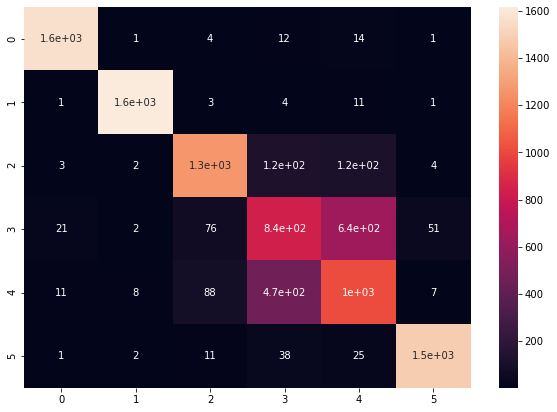

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, cmap='rocket', annot = True)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1602
           1       0.99      0.99      0.99      1636
           2       0.87      0.83      0.85      1514
           3       0.57      0.52      0.54      1624
           4       0.56      0.64      0.59      1594
           5       0.96      0.95      0.95      1562

    accuracy                           0.82      9532
   macro avg       0.82      0.82      0.82      9532
weighted avg       0.82      0.82      0.82      9532



# Classification using logistic regression

In [48]:
lr = LogisticRegression(max_iter=150)
lr.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

In [49]:
y_pred_lr = lr.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, y_pred_lr)
cm

array([[1561,    3,    3,   19,   15,    1],
       [   3, 1611,    1,    7,   13,    1],
       [   4,    3, 1254,  123,  121,    9],
       [  55,   13,   65,  867,  571,   53],
       [  12,   13,   61,  330, 1161,   17],
       [   0,    2,    7,   49,   18, 1486]], dtype=int64)

<AxesSubplot:>

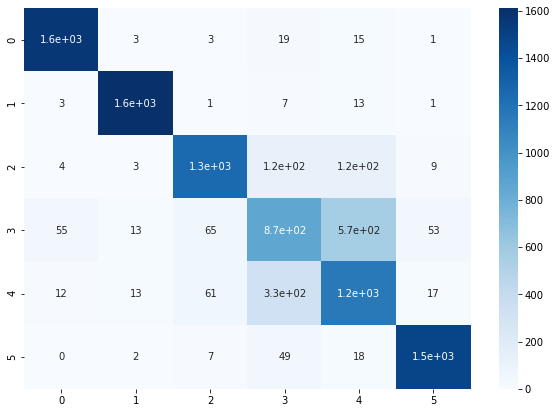

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, cmap='Blues', annot = True )

In [55]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1602
           1       0.98      0.98      0.98      1636
           2       0.90      0.83      0.86      1514
           3       0.62      0.53      0.57      1624
           4       0.61      0.73      0.66      1594
           5       0.95      0.95      0.95      1562

    accuracy                           0.83      9532
   macro avg       0.84      0.83      0.83      9532
weighted avg       0.84      0.83      0.83      9532

